#### Author : SINU S MARIAM
#### Designation : Data Science Intern  
#### Organization : LetsGrowMore
#### Batch : MARCH 2023
#### Task 1 -DEVELOP A NEURAL NETWORK THAT CAN READ HANDWRITING
#### Problem Statement:
* Create a Neural Network Machine Learning Model that can identify  Handwritten digits using Tensorflow and CNN on MNIST Dataset

In [ ]:
#importing necessary libraries 
import tensorflow as tf
#importing libraries for visualisation
import matplotlib.pyplot as plt

In [ ]:
#importing Data
from tensorflow.keras.datasets import mnist 

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(Y_train)

60000



*   Train Dataset has 60000 Digit Images
*   Test Dataset has 10000 Digit Images







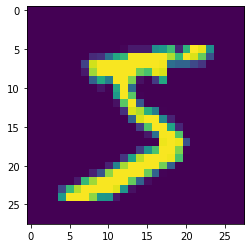

In [ ]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [ ]:
X_train[0].shape

(28, 28)



*  Each image is 28 * 28 in dimension


In [ ]:
 print(Y_train[0])

5


In [ ]:
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', Y_train.shape)
print('Target for test: ', Y_test.shape)

Train set of features:  (60000, 28, 28)
Test set of features:  (10000, 28, 28)
Target for train:  (60000,)
Target for test:  (10000,)


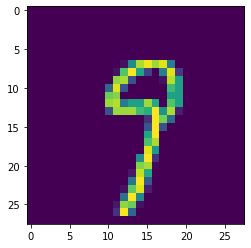

In [ ]:
plt.imshow(X_train[1500])

In [ ]:
print(Y_train[1500])

9


In [ ]:
# 4D array as input to the CNN.
#So input data has a shape of (batch_size, height, width, depth)
#we are dealing with the greyscale images we can add a depth of 1.
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', Y_train.shape)
print('Target for test: ', Y_test.shape)

Train set of features:  (60000, 28, 28, 1)
Test set of features:  (10000, 28, 28, 1)
Target for train:  (60000,)
Target for test:  (10000,)


In [ ]:
from keras.utils import to_categorical
#one-hot encode target column
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
h1=model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 210s 111ms/step - loss: 0.2512 - accuracy: 0.9486 - val_loss: 0.0905 - val_accuracy: 0.9707
Epoch 2/3
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.0634 - val_accuracy: 0.9811
Epoch 3/3
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0667 - val_accuracy: 0.9810


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                46090     
                                                                 
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
__________________________________________________

In [ ]:
Y_pred=model.predict(X_test[:4])

1/1 [==============================] - 0s 73ms/step


In [ ]:
import numpy as np
np.argmax(Y_pred)

7

In [ ]:
Y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
h1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

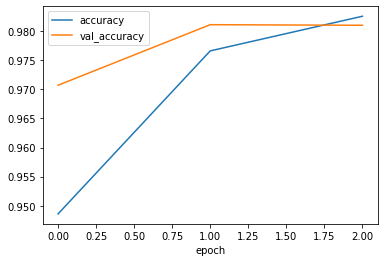

In [ ]:
plt.plot(h1.history["accuracy"],label='accuracy')
plt.plot(h1.history["val_accuracy"],label='val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

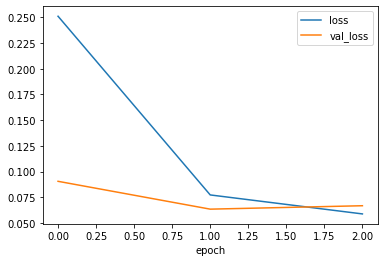

In [ ]:
plt.plot(h1.history["loss"],label='loss')
plt.plot(h1.history["val_loss"],label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
#model.evaluate(X_test,Y_test)